In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import

In [22]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [23]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [24]:
base_model=MobileNetV2(weights='imagenet',include_top=False) #imports the MobileNetV2 model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(7,activation='softmax')(x) #final layer with softmax activation for N classes

model=Model(inputs=base_model.input,outputs=preds) #specify the inputs and outputs

In [25]:
train_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset_Oversampled/train'
test_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset_Oversampled/test'
validation_path = 'G:\Jupyter Notebook Workspace\CLL - Project\FER-2013 Dataset_Oversampled/validation'

In [136]:
from keras.applications.mobilenet import preprocess_input
#Training set
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=20,
                                                class_mode='categorical',
                                                shuffle=True)
#Testing set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator=test_datagen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=20,
                                                class_mode='categorical',
                                                shuffle=False)

Found 32678 images belonging to 7 classes.
Found 5258 images belonging to 7 classes.


In [88]:
print("Batch Size for Input Image : ",train_generator[0][0].shape)
print("Batch Size for Output Image : ",train_generator[0][1].shape)
print("Image Size of first image : ",train_generator[0][0][0].shape)
print("Output of first image : ",train_generator[0][1][0].shape)

Batch Size for Input Image :  (20, 224, 224, 3)
Batch Size for Output Image :  (20, 7)
Image Size of first image :  (224, 224, 3)
Output of first image :  (7,)


In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_4[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                           

In [31]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
step_size_train=train_generator.n//train_generator.batch_size
# step_size_val=val_generator.n//val_generator.batch_size
model.fit(generator=train_generator,
                  steps_per_epoch=step_size_train,
                  epochs=100, 
#                     validation_data=val_generator,
#                   validation_steps=step_size_val
                   )

C:\Users\hp\AppData\Local\Temp/ipykernel_24776/583174512.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/100
1633/1633 [==============================] - 269s 156ms/step - loss: 1.4877 - accuracy: 0.4235
Epoch 2/100
1633/1633 [==============================] - 225s 138ms/step - loss: 1.2285 - accuracy: 0.5222
Epoch 3/100
1633/1633 [==============================] - 222s 136ms/step - loss: 1.1244 - accuracy: 0.5663
Epoch 4/100
1633/1633 [==============================] - 224s 137ms/step - loss: 1.0375 - accuracy: 0.6031
Epoch 5/100
1633/1633 [==============================] - 226s 139ms/step - loss: 0.9738 - accuracy: 0.6320
Epoch 6/100
1633/1633 [==============================] - 223s 137ms/step - loss: 0.9089 - accuracy: 0.6557
Epoch 7/100
1633/1633 [==============================] - 226s 138ms/step - loss: 0.8592 - accuracy: 0.6754
Epoch 8/100
1633/1633 [==============================] - 221s 135ms/step - loss: 0.8101 - accuracy: 0.6961
Epoch 9/100
1633/1633 [==============================] - 222s 136ms/step - loss: 0.7696 - accuracy: 0.7118
Epoch 10/100
1633/1633 [=============

KeyboardInterrupt: 

In [34]:
model_json = model.to_json()
with open("model_mobilnetv2.json", "w") as json_file:
    json_file.write(model_json)
    model.save_weights("weights_mobilnetv2.h5") # serialize weights to HDF5

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [35]:
  model.save("model_mobilnetv2.h5")

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [37]:
predictions = model.predict(test_generator, verbose=1)

263/263 [==============================] - 14s 51ms/step


In [38]:
print(predictions.shape)
np.round(predictions) 

(5258, 7)


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=1))

In [115]:
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize= False, 
                          title='Confusion Matrix',
                         cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalization")
        
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
            horizontalalignment = "center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label') 
    

In [116]:
test_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Confusion Matrix, Without Normalization
[[ 312    2  111   30  105   62   16]
 [  35   46   10    4    5    8    3]
 [  71    0  362   27  102   78   64]
 [  33    0   52 1102  186   19   62]
 [  44    0   75   47  626   94   27]
 [  91    2  154   43  258  365   14]
 [  14    0   63   31   25    7  371]]

               precision    recall  f1-score   support

           0       0.52      0.49      0.50       638
           1       0.92      0.41      0.57       111
           2       0.44      0.51      0.47       704
           3       0.86      0.76      0.80      1454
           4       0.48      0.69      0.56       913
           5       0.58      0.39      0.47       927
           6       0.67      0.73      0.69       511

    accuracy                           0.61      5258
   macro avg       0.64      0.57      0.58      5258
weighted avg       0.63      0.61      0.61      5258



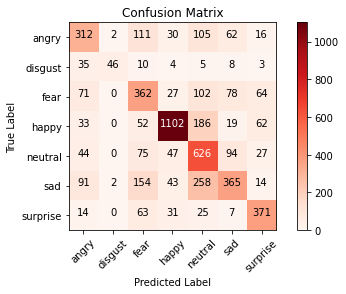

In [117]:
cm_plot_labels = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

from sklearn.metrics import classification_report
print("\n",classification_report(test_generator.classes, y_pred=np.argmax(predictions, axis=1)))

In [46]:
accuracy_score(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=1))

0.605553442373526

In [137]:
indian_path = "G:\Jupyter Notebook Workspace\CLL - Project\Indian faces\indian"
indian_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
indian_generator=indian_datagen.flow_from_directory(indian_path,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=20,
                                                class_mode='categorical',
                                                shuffle=False)

Found 0 images belonging to 0 classes.


In [138]:
predictions_indian = model.predict(indian_generator, verbose=1)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [145]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.mobilenet import preprocess_input


def decode_prediction(prediction_nd_array):
    classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']
    index = np.argmax(prediction_nd_array, axis=1)
#     print(index)
    return classes[index.item()] # item() converts matrix to a scaler

def predictLabelsForMyImages(image_path, prediction_array):
#     img = plt.imread(image_path)
#     plt.imshow(my_image, cmap="gray")    

    #load the image
    my_image = load_img(image_path, target_size=(224, 224), color_mode='rgb')
    
    #preprocess the image
    my_image = img_to_array(my_image)
    print(my_image.shape)
#     my_image = my_image.reshape((1, my_image.shape[0],  my_image.shape[1]))
    my_image = my_image.reshape(model.layers[0].input_shape)
    my_image = preprocess_input(my_image)
    print(my_image.shape)
    
    #make the prediction
    prediction = model.predict(my_image)
    # print("Prediction: ",prediction)
    print("Rounded predictions: ", np.round(prediction) )
    print(decode_prediction(prediction))
    prediction_array.append(decode_prediction(prediction))

    
def plotImages(images_arr):
    fig, axes = plt.subplots(2,5, figsize=(20,20))
    axes = axes.flatten()
    i = -1
    for img, ax in zip(images_arr, axes):
        i += 1
        image = plt.imread(img)
        ax.imshow(image, cmap="gray")
        ax.set_title(predictions_as_labels[i], fontdict={'fontsize': 26, 'fontweight': 'medium'})
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [146]:
# for layer in model.layers:
#     print(layer.input_shape)

model.layers[0].input_shape

[(None, None, None, 3)]

In [147]:
from pathlib import Path
 
# get the path/directory
folder_dir = r'G:\Jupyter Notebook Workspace\CLL - Project\Indian faces\indian'

predictions_as_labels = []

# iterate over files in
# that directory
image_array=[]
images = Path(folder_dir).glob('*.jpg')
for image in images:
    image_array.append(str(image))
    print("\n",str(image)[64:])
    predictLabelsForMyImages(image, predictions_as_labels)

print("\n",predictions_as_labels)

plotImages(image_array)


 female_happy_1.jpg
(224, 224, 3)
(224, 224, 3)


ValueError: in user code:

    File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "Conv1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, None, None)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, None, None), dtype=float32)
      • training=False
      • mask=None
